# Лабораторная работа 4. 
 
---

## Краткие теоретические сведения

Постановка задачи:
Требуется найти непрерывную на замкнутом прямоугольнике D функцию u(x, t), которая на D′ удовлетворяет уравнению теплопроводности:

Постановка задачи:
Требуется найти непрерывную на замкнутом прямоугольнике $D$ функцию $u(x, t)$, которая на $D′$ удовлетворяет уравнению теплопроводности:

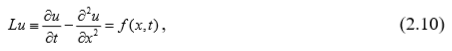

которое при $t = 0$ удовлетворяет начальному условию

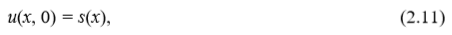

а при $х = 0$ и $х = 1$ подчиняется краевым условиям

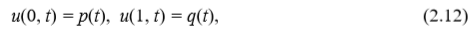

где $f(x, t), s(x), p(t), q(t)$ − заданные достаточно гладкие функции, причем  $s(0) = p(0),  s(l) = q(l)$. Задача $(2.10)$ − $(2. 12)$ называется смешанной задачей, поскольку она содержит как начальные условия, так и краевые условия. Известно, $(11)$ что у поставленной задачи существует единственное решение $u(х, t)$. Мы будем предполагать, что это решение имеет на замкнутом прямоугольнике D непрерывные частные производные

<h3><center>$\partial u / \partial t, \partial^2u/\partial t^2, \partial^2u/\partial x^2, \partial ^4 u /\partial x ^4$</center></h3>

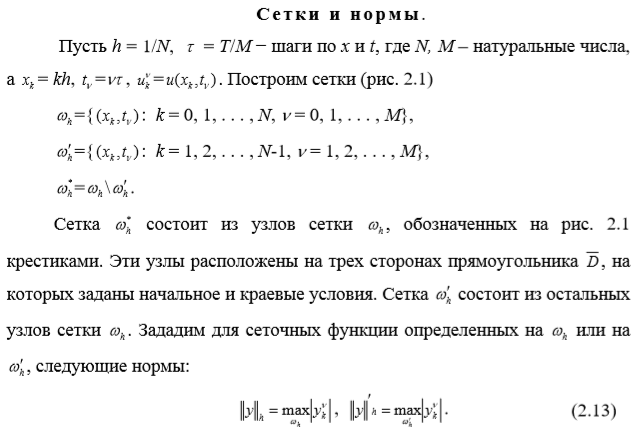
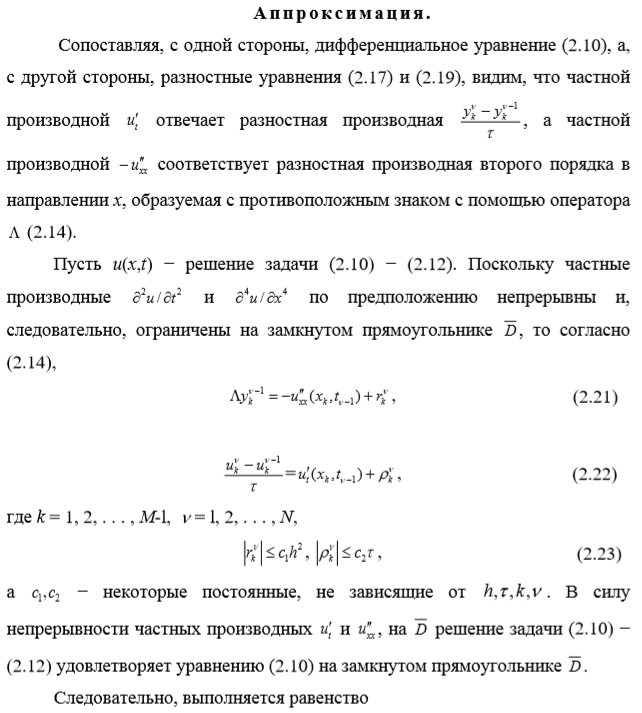
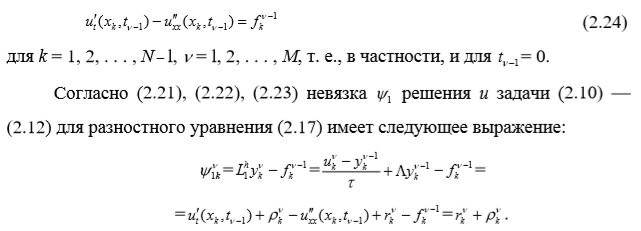
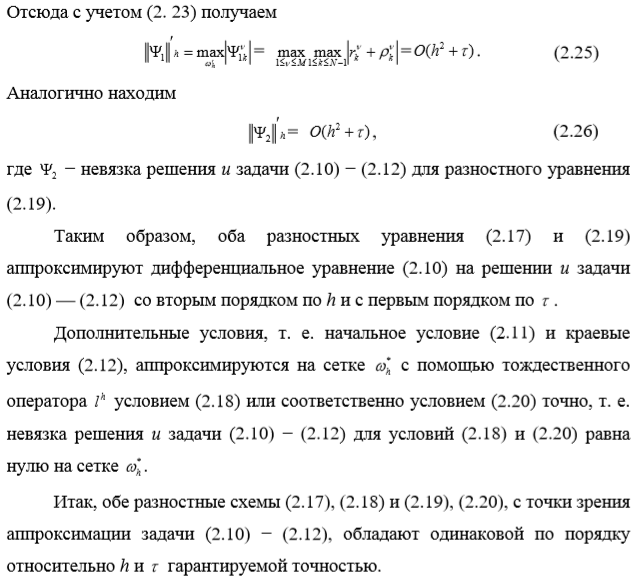

### Устойчивость и сходимость

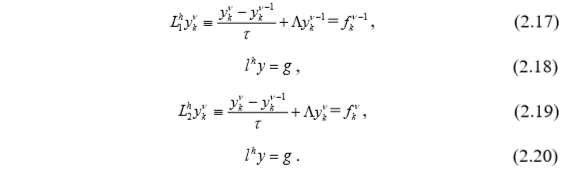
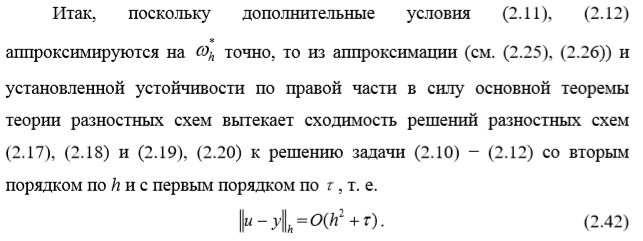
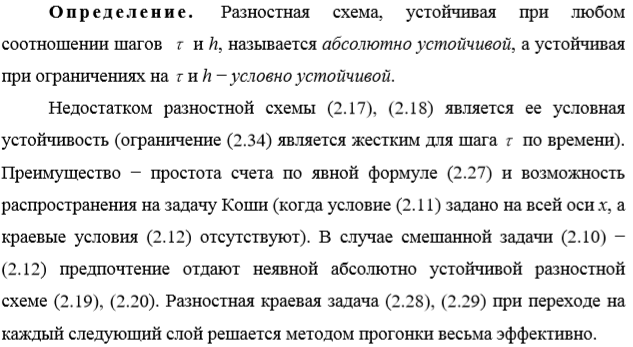

## Задание 1
**Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи. Найти приближенное решение начально-краевой задачи для уравнения теплопроводности:**

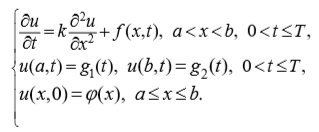

Исходные данные:
$T=1, a=-1, b=1, k=0.2, f(x,t)=0, g_1(t)=1, g_2(t)=t, \varphi(x)=x^2$

## Решение
Составим разностную схему:

### $\frac{\partial u}{\partial t} = k'(x)\frac{\partial u}{\partial x} + k(x)\frac{\partial^2 u}{\partial x^2} + f(x, t)$

### $\frac{\partial u}{\partial t} = \frac{u^k_i - u^{k-1}_{i}}{\tau}$

### $\frac{\partial u}{\partial x} = \frac{u^k_i - u^{k}_{i-1}}{h}$

### $\frac{\partial^2 u}{\partial x^2} = \frac{u^k_{i+1} - 2u^{k}_{i} + u^k_{i-1}}{h^2}$

### $\frac{u^k_i - u^{k-1}_{i}}{\tau} = k'(x)\frac{u^k_i - u^{k}_{i-1}}{h} + k(x)\frac{u^k_{i+1} - 2u^{k}_{i} + u^k_{i-1}}{h^2} + f(x,t)2\tau h^2$

В результате получим систему:

### $-\tau k(x)u^k_{i+1} + u^k_i(h^2-\tau h k'(x) + 2 \tau k(x)) + u^k_{i-1}(\tau h k'(x) - \tau k(x)) = \tau h^2f(x,t)+h^2u^{k-1}_i$

Которую можно решить методом прогонки

$h = \frac{b - a}{10} = 0.2$, 
$\tau = 0.05\frac{h^2}{k} = 0.001$

#### Импортируем библиотеки

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [2]:
def solve_implicit(x_start, x_end, h, tau, k, f, cur_t, prev_row, ua, ub):
    x, t = sp.symbols('x t')

    xs = np.arange(x_start, x_end + h, h)
    n = len(xs)
    
    a = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(1, n - 1):
        a[i][i - 1] = - tau * k.subs({x: xs}) # a[i]
        a[i][i] = h**2 + 2 * tau * k.subs({x: xs}) # b[i]
        a[i][i + 1] = -tau * k.subs({x: xs}) # c[i]
        
        b[i] = h**2 * prev_row[i] + tau * h**2 * f.subs({x: xs, t: cur_t}) # f[i]
    
    # y0 = ua, yn = ub 
    a[0][0] = 1
    b[0] = ua.subs({t: cur_t})
    a[-1][-1] = 1
    b[-1] = ub.subs({t: cur_t})
    
    return np.linalg.solve(a, b)

In [3]:
def solve_explicit(x0, x1, t0, t1, h, tau, k, f, phi, ua, ub):
    x, t = sp.symbols('x t')
    
    xss = np.arange(x0, x1 + h, h)
    tss = np.arange(t0 + tau, t1 + tau, tau)
           
    nt, nx = len(tss) + 1, len(xss)
    u = np.zeros((nt, nx))
    
    for i, xi in enumerate(xss):
        u[0][i] = phi.subs({x: xi})
    
    for i, ti in enumerate(tss):
        u[i + 1][0] = ua.subs({t: ti})
        u[i + 1][-1] = ub.subs({t: ti})
    
    for i, ti in enumerate(np.arange(t0, t1 + tau, tau)):
        if i == 0:
            continue
        for j, xj in enumerate(np.arange(x0, x1, h)):
            if j == 0:
                continue
            u[i][j] = 1 / h**2 * (
                u[i - 1][j + 1] * tau * k + 
                u[i - 1][j] * (h**2 + tau * h * k.diff(x) - 2 * tau * k) + 
                u[i - 1][j - 1] * (tau * k - tau * h * k.diff(x)) +
                tau * h**2 * f
            ).subs({x: xj, t: ti})
            
    return u

In [4]:
x, tt = sp.symbols('x t')
x0, x1, t0, t1, ua, ub = 0, 1, 0, 0.1, 1, 1 * tt

k4 = 2
h = 0.2
tau = 0.5 * h**2 / k4 # tau <= 0.5 h**2 / k - условие устойчивости 
nt, nx = len(np.arange(t0, t1 + tau, tau)), len(np.arange(x0, x1 + h, h))
phi = x**2

g, t = sp.symbols('g t')
g = 0 * x + 0 * t

In [5]:
def get_u(x0, x1, t0, t1, k4, h, tau, phi, ua, ub):
    nx = len(np.arange(x0, x1 + h, h))
    u = np.zeros((nt, nx))

    for i, xi in enumerate(np.arange(x0, x1 + h, h)):
        u[0][i] = phi.subs({x: xi})

    for j, t in enumerate(np.arange(t0, t1, tau)):
        if j == 0:
            continue
        yy = solve_implicit(
            x_start=x0,
            x_end=x1,
            h=h,
            tau=tau,
            k=k4 + 0 * x,
            f=g,
            cur_t=t,
            prev_row=u[j - 1, :],
            ua=ua+0*tt,
            ub=ub
        )

        u[j] = yy
        
        if h >= 0.001:
            plt.plot(np.arange(x0, x1 + h, h), yy)
        
    plt.show()
    return u

### Неявная схема

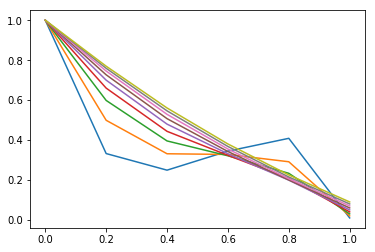

cur_h = 0, h = 


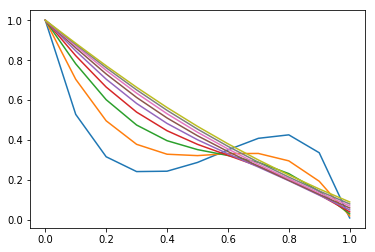

cur_h = 0, h = 


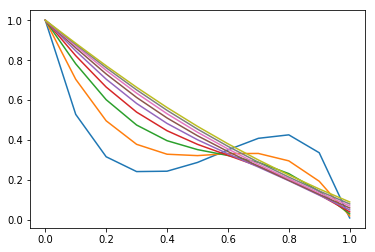

cur_h = 1, h = 


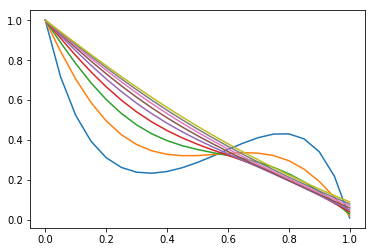

cur_h = 1, h = 


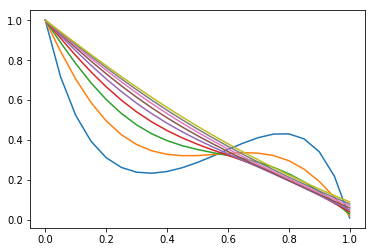

cur_h = 2, h = 


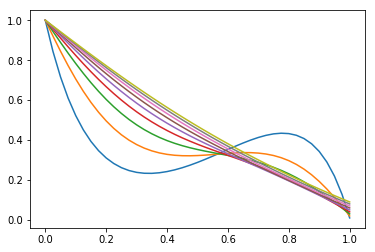

cur_h = 2, h = 


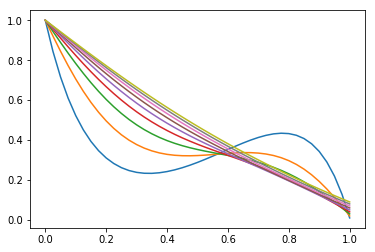

cur_h = 3, h = 


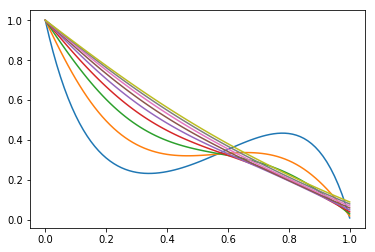

cur_h = 3, h = 


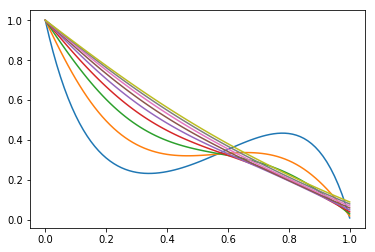

cur_h = 4, h = 


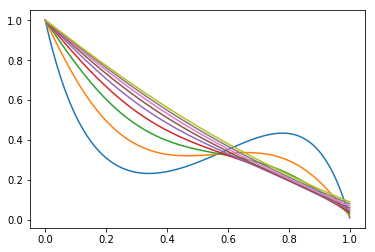

cur_h = 4, h = 


In [6]:
h = 0.2
h_steps = [h, h / 2, h / 4, h / 8, h / 16, h / 32]
errors = []

for cur_h in range(len(h_steps) - 1):
    h = h_steps[cur_h]
    u = get_u(x0, x1, t0, t1, k4, h, tau, phi, ua, ub)
    print('cur_h = {}, h = '.format(cur_h, h))
    
    h1 = h_steps[cur_h + 1]
    u1 = get_u(x0, x1, t0, t1, k4, h1, tau, phi, ua, ub)
    print('cur_h = {}, h = '.format(cur_h, h1))
    
    errors.append(np.mean(np.abs(u - u1[:, ::2])))

### Построим графики зависимости величины ошибки от шага для явной схемы:

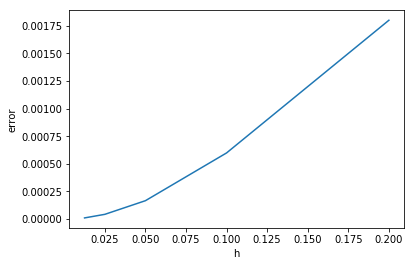

In [7]:
#errors
plt.xlabel('h')
plt.ylabel('error')
plt.plot(h_steps[:-1], errors);

In [8]:
s = np.arange(x0, x1 + h, h)
t = np.arange(t0, t1 + tau, tau)
tGrid, sGrid = np.meshgrid(t, s)

surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='t',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='u(x, t)',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True);

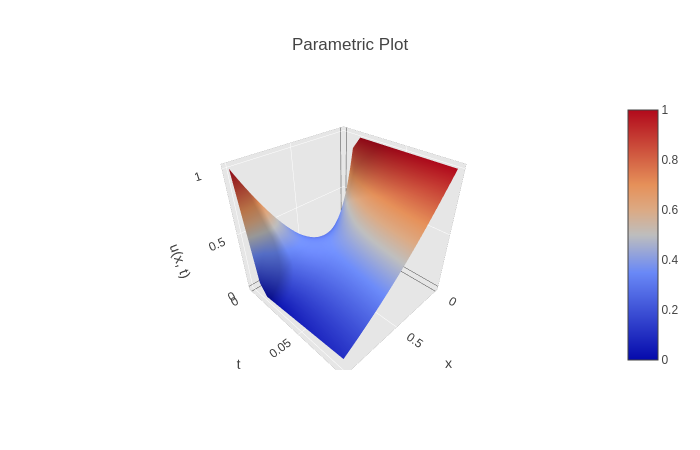
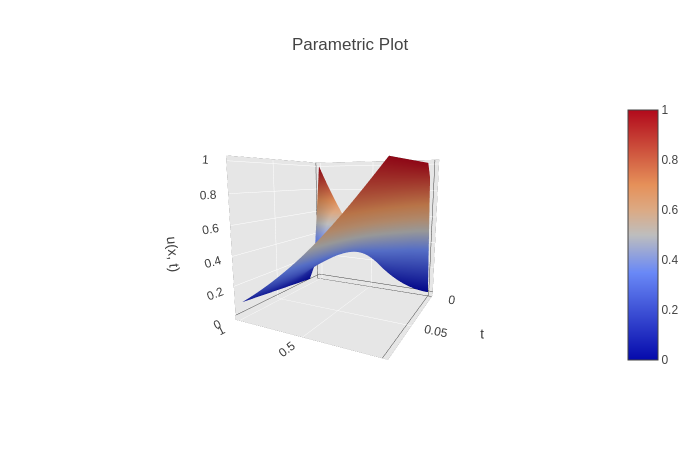
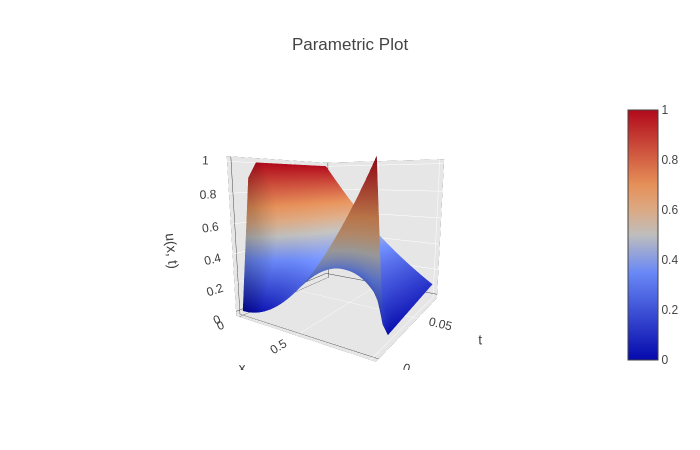

### Построим графики зависимости величины ошибки от шага для неявной схемы:

In [9]:
def get_u_explicit(x0, x1, t0, t1, h, tau, k4, g, phi, ua, ub):
    tt = sp.symbols('t')
    u = solve_explicit(
        x0,
        x1,
        t0, 
        t1,
        h=h,
        tau=tau,
        k=k4 + 0 * x,
        f=g,
        phi=phi,
        ua=ua + 0 * tt,
        ub=ub
    )
    return u

In [10]:
h = 0.2
h_steps = [h, h / 2, h / 4, h / 8]
errors_explicit = []

for cur_h in range(len(h_steps) - 1):
    h = h_steps[cur_h]
    tau = 0.5 * h**2 / k4
    u = get_u_explicit(x0, x1, t0, t1, h, tau, k4, g, phi, ua, ub)
    
    h1 = h_steps[cur_h + 1]
    tau1 = 0.5 * h1**2 / k4
    u1 = get_u_explicit(x0, x1, t0, t1, h1, tau1, k4, g, phi, ua, ub)
    
    errors_explicit.append(np.mean(np.abs(u - u1[::int(tau // tau1), ::2])))

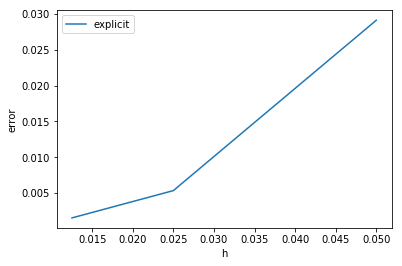

In [11]:
plt.xlabel('h')
plt.ylabel('error')

h_steps_explicit = [h, h / 2, h / 4, h / 8]

plt.xlabel('h')
plt.ylabel('error')
plt.plot(h_steps_explicit[:-1], errors_explicit, label='explicit');
#plt.plot(h_steps[:-1], errors, label='implicit')
plt.legend();

In [12]:
s = np.arange(x0, x1 + h, h)
t = np.arange(t0, t1 + tau, tau)
tGrid, sGrid = np.meshgrid(t, s)

surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='t',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='u(x, t)',
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True);

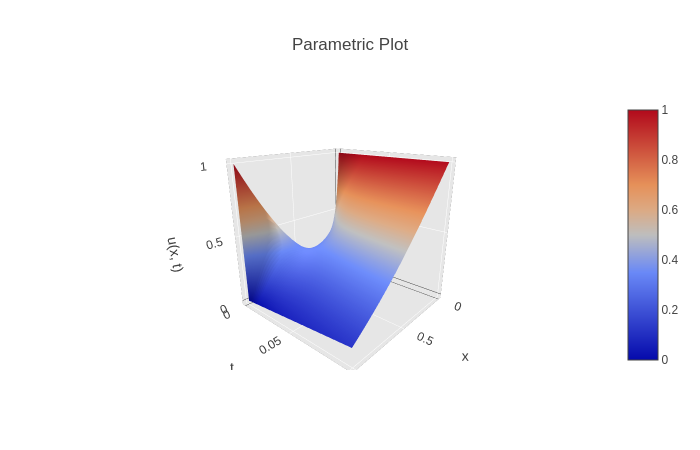
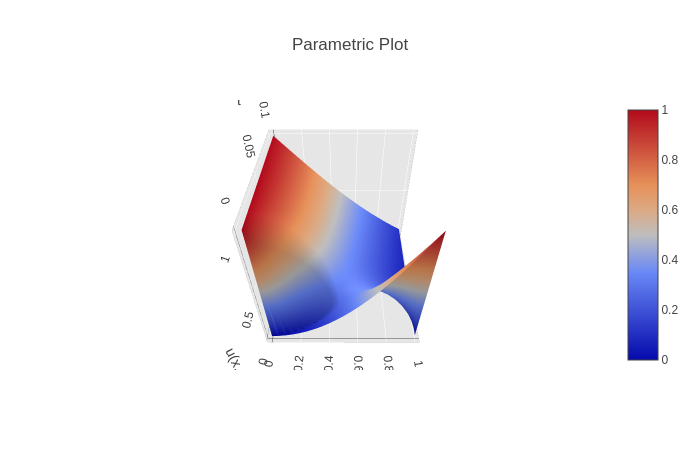

Исследуем явную схему при различных значениях $\tau$ и $h$

При $\tau = 5\tau_0$

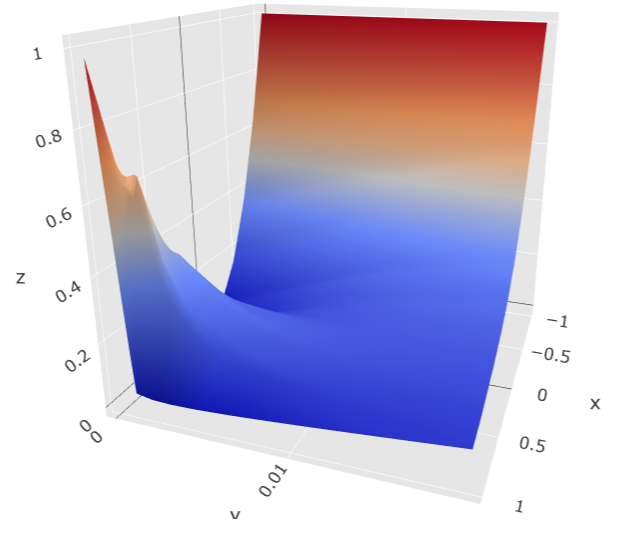

При $\tau = 10\tau_0$

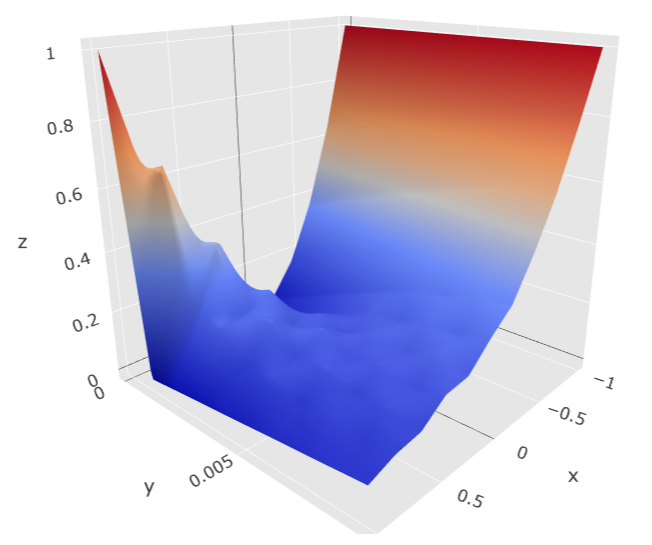

При $\tau = 15\tau_0$

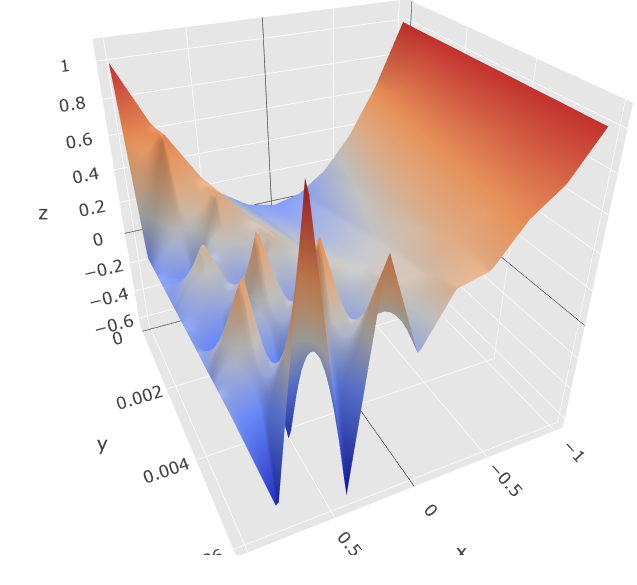

По графикам можно сделать вывод, что существует квадратичная зависимость между величиной шага и ошибкой. Также можно видеть, что величина ошибки для явной схемы значительно больше, чем для неявной.

## Вывод

В результате лабораторной работы был исследован метод сеток решения нестационарного однородного уравнения теплопроводности, изучено поведение решения при различных начальных условиях и разностных схемах. Также было проверено на практике условие устойчивости явной схемы метода сеток.